In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

$$\frac{d^2x}{dt^2}+\alpha\frac{dx}{dt}+\omega_0^2x=\beta\cos (\omega t)$$

In [2]:
x = sp.Function('x', real=True)
t = sp.Symbol('t', real=True)
x0 = sp.Symbol('x_0', real=True)
v0 = sp.Symbol('v_0', real=True)

w0 = sp.Symbol('omega_0', real=True)
alpha = sp.Symbol('alpha', real=True)
beta = sp.Symbol('beta', real=True)
w = sp.Symbol('omega', real=True)

x(t), t, x0, v0, alpha, w0, beta, w

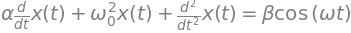

In [3]:
eq = sp.Eq(x(t).diff(t, t) + alpha*x(t).diff(t) + w0**2*x(t), beta*sp.cos(w*t))
eq

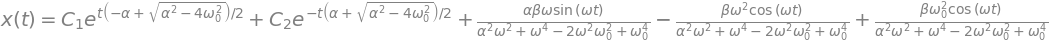

In [4]:
sp.dsolve(eq, x(t))

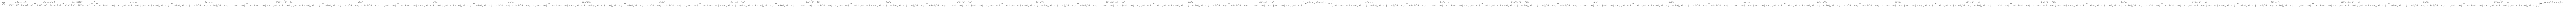

In [5]:
sol = sp.dsolve(eq, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})
sol

In [20]:
def quick_oscillator(times, _w0=1, _alpha=0.0001, _beta=0, _w=1):
    soll = sp.lambdify(t, sol.copy().rhs.subs({w0:_w0, alpha:_alpha, beta:_beta, w:_w, x0:1, v0:0}))
    return np.real(soll(times))

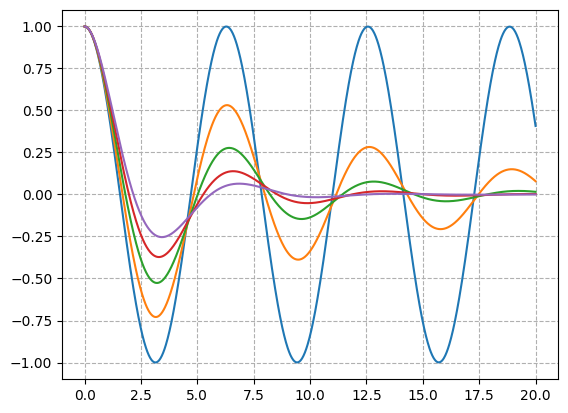

In [25]:
ts = np.linspace(0.001, 20, 1000)
params = [0.0001, 0.2, 0.4, 0.6, 0.8]
for p in params:
    plt.plot(ts, quick_oscillator(ts, _alpha=p))
plt.grid(linestyle='--')

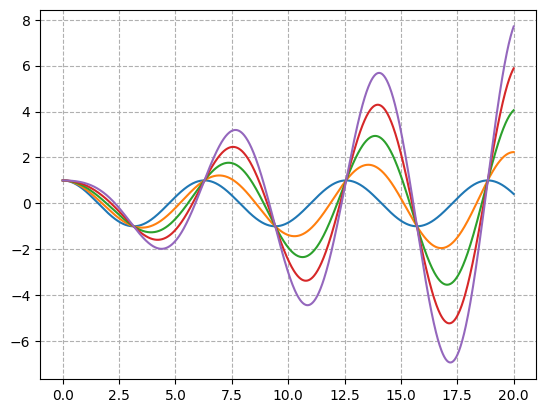

In [28]:
ts = np.linspace(0.001, 20, 1000)
params = [0.0001, 0.2, 0.4, 0.6, 0.8]
for p in params:
    plt.plot(ts, quick_oscillator(ts, _beta=p, _w=1.0))
plt.grid(linestyle='--')

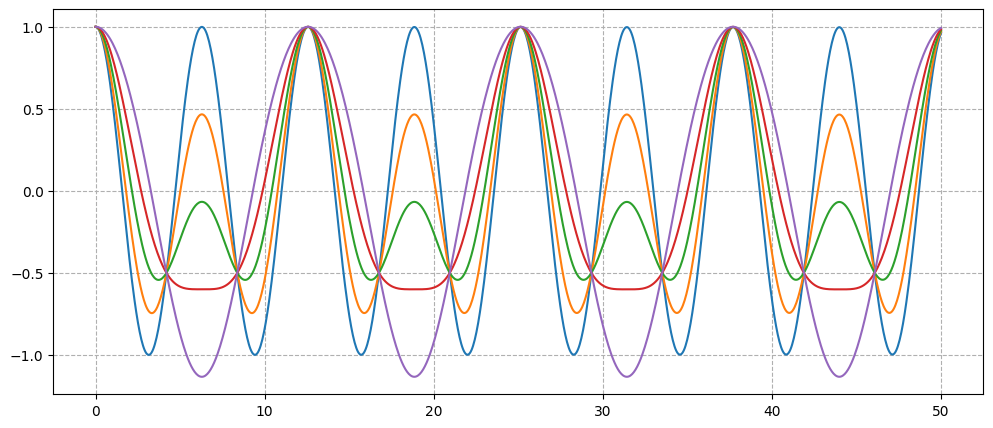

In [47]:
plt.figure(figsize=(12, 5))
ts = np.linspace(0.001, 50, 1000)
params = [0.0001, 0.2, 0.4, 0.6, 0.8]
for p in params:
    plt.plot(ts, quick_oscillator(ts, _beta=p, _w=0.5))
plt.grid(linestyle='--')

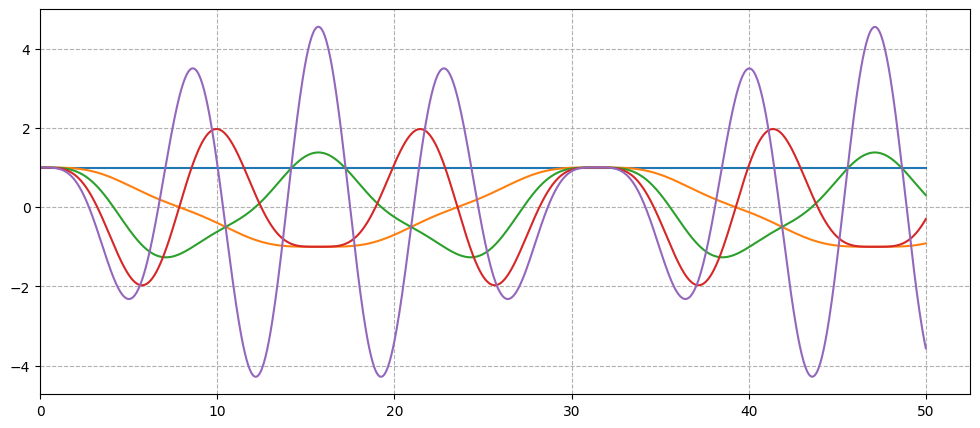

In [44]:
plt.figure(figsize=(12, 5))
ts = np.linspace(0.001, 50, 1000)
params = [0.0001, 0.2, 0.4, 0.6, 0.8]
for p in params:
    plt.plot(ts, quick_oscillator(ts, _beta=1, _w=p))
plt.xlim(left=0)
plt.grid(linestyle='--')

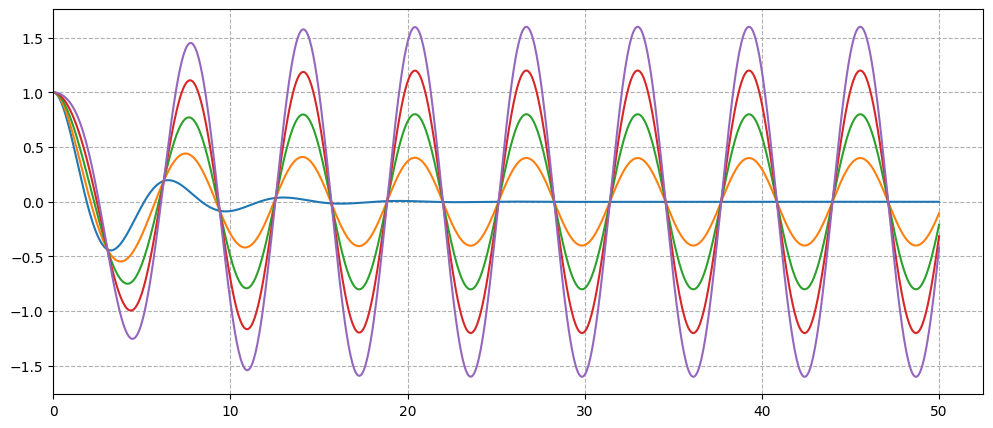

In [46]:
plt.figure(figsize=(12, 5))
ts = np.linspace(0.001, 50, 1000)
params = [0.0001, 0.2, 0.4, 0.6, 0.8]
for p in params:
    plt.plot(ts, quick_oscillator(ts, _alpha=0.5, _beta=p, _w=1))
plt.xlim(left=0)
plt.grid(linestyle='--')